In [1]:
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)
from csv import DictReader

pointcalls = []
with open('../../data/navigo_all_pointcalls.csv', newline='') as csvfile:
    reader = DictReader(csvfile)
    for row in reader:
        if row['date_fixed'].split('-')[0] == '1787' \
            and row['source_suite'] == "G5" \
            and row['pointcall_function'] == "O":
           # and row['toponyme_fr'] == 'Marseille' \
            pointcalls.append(row)


In [2]:
from collections import defaultdict
tonnage = defaultdict(float)

for row in pointcalls:
    if row["tonnage"]:
        tonnage[row["toponyme_fr"]] += float(row["tonnage"])
    

In [3]:
tonnage

defaultdict(float,
            {'Dunkerque': 109038.0,
             'Boulogne-sur-Mer': 24044.0,
             'Granville': 22430.0,
             'Calais': 28070.0,
             'Le Croisic': 18717.0,
             'Port-Bail': 3779.0,
             'Barfleur': 1926.0,
             'Dieppe': 42920.0,
             'Marennes': 73139.0,
             'Brest': 40916.0,
             'Cherbourg': 40779.0,
             'Saint-Malo': 50643.0,
             'Rouen': 122202.0,
             'La Hougue': 5750.0,
             'Saint-Valery-sur-Somme': 19098.0,
             'Le Havre': 219429.0,
             'Marans': 13577.0,
             'Rochefort': 28313.0,
             'Ribérou': 7330.0,
             'Lorient': 68277.0,
             'Omonville': 78.0,
             'Isigny': 5996.0,
             'Le Tréport': 2302.0,
             'Courtils': 592.0,
             'île de Bouin': 5570.0,
             'Beauvoir-sur-Mer': 3862.0,
             'Bayonne': 41699.0,
             'Landerneau': 3994.0,
        

In [4]:
tonnage = sorted([{"port": k, "tonnage": v} for k, v in tonnage.items()], key=lambda x: x["tonnage"], reverse=True)[:20]

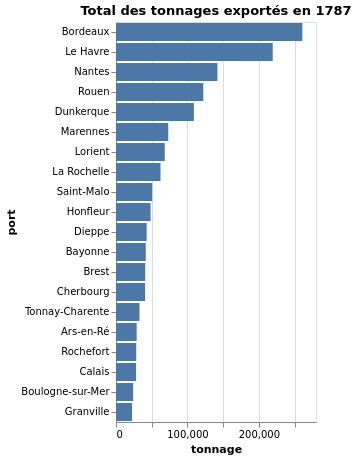

In [5]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Total des tonnages exportés en 1787",
    "mark": "bar",
    "data": {
        "values": tonnage
    },
    "encoding": {
        "x": {
            "field": "tonnage",
            "type": "quantitative", 
            "title": "tonnage"
        },
        "y": {
            "field": "port",
            "type": "nominal",
            "title": "port",
            "sort": "-x"
        }
    }
})

In [6]:
pointcalls = []
with open('../../data/navigo_all_pointcalls.csv', newline='') as csvfile:
    reader = DictReader(csvfile)
    for enum, row in enumerate(reader):
        if enum < 5:
            print(row['source_suite'])
        if row['date_fixed'].split('-')[0] == '1787' \
            and (row["source_suite"] == "Registre du petit cabotage (1786-1787)" or \
                 row["source_suite"] == "la Santé registre de patentes de Marseille") \
            and row['pointcall_function'] == "O" \
            and row['net_route_marker'] != "Q":
            pointcalls.append(row)



G5
G5
G5
la Santé registre de patentes de Marseille
G5


In [7]:
source_suites = defaultdict(int)
for row in pointcalls:
    if row["source_suite"]:
        source_suites[row["source_suite"]] += 1

In [8]:
source_suites

defaultdict(int,
            {'Registre du petit cabotage (1786-1787)': 2359,
             'la Santé registre de patentes de Marseille': 3296})

In [9]:
import pandas as pd

TONNAGE_SPREADSHEET_URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTYdeIwpzaVpY_KS91cXiHxb309iYBS4JN_1_hW-_oyeysuwcIpC2VJ5fWeZJl4tA/pub?output=csv'
estimation_tonnage = pd.read_csv(TONNAGE_SPREADSHEET_URL)

In [10]:
entrees = pd.DataFrame(pointcalls)
entrees["ship_class_standardized"]

0       Tartane
1       Tartane
2        Chebec
3       Tartane
4        Bateau
         ...   
5650    Tartane
5651     Pinque
5652     Bateau
5653     Allège
5654     Bateau
Name: ship_class_standardized, Length: 5655, dtype: object

In [11]:
estimation_tonnage = estimation_tonnage[estimation_tonnage.tonnage_estime_en_tx != "No data"]
estimation_tonnage

,ship_class,tonnage_estime_en_tx
0,Allège,100
3,Balandre,35
5,Barque,150
6,Bateau,5
7,Bâtiment,50
8,Bisque,20
9,Bombarde,140
10,Brick,100
11,Brigantin,150
12,Canary,15


In [12]:
jointure = entrees.merge(estimation_tonnage, 
                           left_on="ship_class_standardized",
                           right_on="ship_class",
                           how="left")

In [13]:
jointure.tonnage_estime_en_tx.value_counts()

50     2339
5      1416
150     684
100     329
80      317
300     221
10      133
160      80
175      58
140      47
130      13
250       3
Name: tonnage_estime_en_tx, dtype: int64

In [26]:
jointure[jointure.tonnage_estime_en_tx.isna()].ship_class_standardized

585     Galéasse
710        Côtre
1347      Londro
1633       Canot
2297       Côtre
2474            
2613            
2721            
2723            
2724            
2725            
2848       Canot
3206       Côtre
3294            
3559       Côtre
Name: ship_class_standardized, dtype: object

In [14]:
mean = jointure[jointure.tonnage_estime_en_tx.notna()].tonnage_estime_en_tx.astype(int).mean()

In [24]:
mean

68.17198581560284

In [15]:
jointure["tonnage_corrige"] = jointure.tonnage_estime_en_tx.fillna(mean).astype(int)

In [16]:
jointure["tonnage_corrige"].dtype

dtype('int64')

In [17]:
tonnage_total_Marseille = jointure.groupby("toponyme_fr")["tonnage_corrige"].sum()[0]

In [18]:
tonnage_total_Marseille

385510

In [19]:
for row in tonnage:
    row["color"] = "sorties"

In [20]:
tonnage.append({"port": "Marseille", "tonnage": tonnage_total_Marseille, "color": "entrées - tonnage estimé"})

In [21]:
tonnage

[{'port': 'Bordeaux', 'tonnage': 260896.0, 'color': 'sorties'},
 {'port': 'Le Havre', 'tonnage': 219429.0, 'color': 'sorties'},
 {'port': 'Nantes', 'tonnage': 141995.0, 'color': 'sorties'},
 {'port': 'Rouen', 'tonnage': 122202.0, 'color': 'sorties'},
 {'port': 'Dunkerque', 'tonnage': 109038.0, 'color': 'sorties'},
 {'port': 'Marennes', 'tonnage': 73139.0, 'color': 'sorties'},
 {'port': 'Lorient', 'tonnage': 68277.0, 'color': 'sorties'},
 {'port': 'La Rochelle', 'tonnage': 62296.0, 'color': 'sorties'},
 {'port': 'Saint-Malo', 'tonnage': 50643.0, 'color': 'sorties'},
 {'port': 'Honfleur', 'tonnage': 48393.0, 'color': 'sorties'},
 {'port': 'Dieppe', 'tonnage': 42920.0, 'color': 'sorties'},
 {'port': 'Bayonne', 'tonnage': 41699.0, 'color': 'sorties'},
 {'port': 'Brest', 'tonnage': 40916.0, 'color': 'sorties'},
 {'port': 'Cherbourg', 'tonnage': 40779.0, 'color': 'sorties'},
 {'port': 'Tonnay-Charente', 'tonnage': 32882.0, 'color': 'sorties'},
 {'port': 'Ars-en-Ré', 'tonnage': 28922.0, 'colo

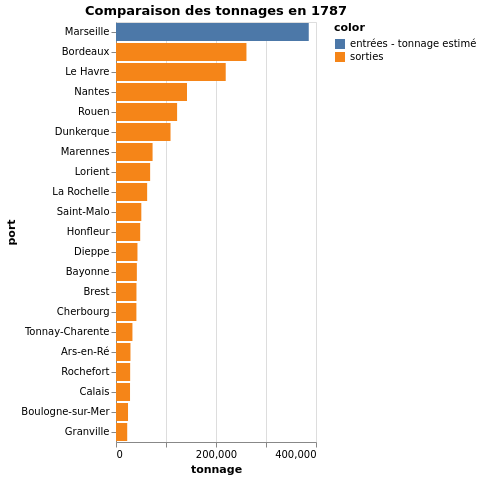

In [23]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Comparaison des tonnages en 1787",
    "mark": "bar",
    "data": {
        "values": tonnage
    },
    "encoding": {
        "x": {
            "field": "tonnage",
            "type": "quantitative", 
            "title": "tonnage"
        },
        "y": {
            "field": "port",
            "type": "nominal",
            "title": "port",
            "sort": "-x"
        },
        "color": {"field": "color"}
    }
})